In [1]:
import torch
from torch.autograd import Variable

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.datasets as ds

%matplotlib inline

In [2]:
X, Y = ds.load_digits(n_class=2, return_X_y=True)

Y = Y.reshape((-1, 1)).astype('float32')

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

num_samples = len(Y_train)
num_features = X_train.shape[1]

In [4]:
X_train = Variable(torch.Tensor(X_train), requires_grad=False)
Y_train = Variable(torch.Tensor(Y_train), requires_grad=False)

X_test = Variable(torch.Tensor(X_test), requires_grad=False)
Y_test = Variable(torch.Tensor(Y_test), requires_grad=False)

In [5]:
W = Variable(torch.randn(num_features, 1), requires_grad=True)
b = Variable(torch.zeros(1, 1), requires_grad=True)

In [6]:
def calc_result(W, b, X):
    return torch.sigmoid(torch.mm(X, W) + b).clamp(min=1e-8, max=0.999)

def calc_cost(result, Y):
    return -torch.mean(Y * torch.log(result) + (1. - Y) * torch.log(1. - result))

for epoch in range(1000):
    result = calc_result(W, b, X_train)
    cost = calc_cost(result, Y_train) + torch.sum(W.pow(2))
    
    result_test = calc_result(W, b, X_test)
    error = torch.mean(torch.eq(result_test >= 0.5, Y_test.byte()).float())
    
    if epoch % 100 == 0:
        print(cost.data[0], error.data[0])
            
    cost.backward()
    
    W.data -= 0.01 * W.grad.data
    b.data -= 0.01 * b.grad.data
    
    W.grad.data.zero_()
    b.grad.data.zero_()

77.50751495361328 0.3888888955116272
1.211103081703186 0.9666666388511658
0.0813431516289711 1.0
0.06706685572862625 1.0
0.0668545588850975 1.0
0.06685012578964233 1.0
0.06684894859790802 1.0
0.06684780865907669 1.0
0.06684667617082596 1.0
0.06684554368257523 1.0


In [7]:
results = calc_result(W, b, Variable(torch.Tensor(X[0:6])))    

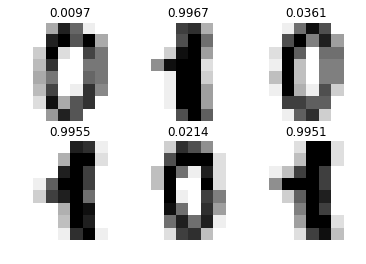

In [8]:
_, ax = plt.subplots(2, 3)
for i in range(6):    
    fig = ax[i // 3, i % 3]
    fig.imshow(X[i].reshape((8, 8)), cmap=plt.cm.gray_r)
    fig.set_title('%.4f' % results.data[i][0]) 
    fig.axis('off')